In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [6]:
data = pd.read_csv('Mark.txt', sep=',', header=None, names=['Mark_1', 'Mark-2', 'Admitted'])
data

,Mark_1,Mark-2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


## Splitting Data

In [7]:
features = ['Mark_1', 'Mark-2']
target = 'Admitted'
X = data[features]
y = data[target]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

In [8]:
print(f'Train Data: {X_train.shape}')
print(f'Validation Data: {X_valid.shape}')

Train Data: (75, 2)
Validation Data: (25, 2)


## Standardizing Data

In [9]:
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_valid_scaled = pd.DataFrame(sc.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

### Comparing Before and After Standardization

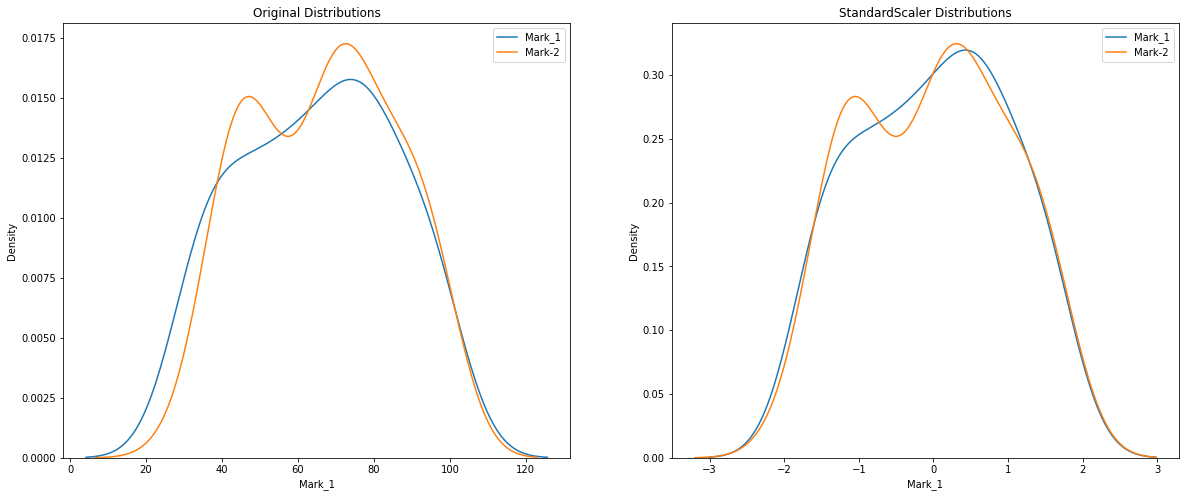

In [10]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,8))
ax1.set_title('Original Distributions')

for f in features:
    sns.kdeplot(X_train[f], ax=ax1, label=f)
ax1.legend()

ax2.set_title('StandardScaler Distributions')

for f in features:
    sns.kdeplot(X_train_scaled[f], ax=ax2, label=f)
ax2.legend()

plt.show()

## Modelling

In [21]:
class LogReg_GD:
    def __init__(self, n_Var):
        self.bias = 0
        self.weight = np.random.randn(n_Var)
    
    def sigmoid_function(self, z):
        return 1/(1+np.exp(-z))

    def predict(self, weight, X, bias):
        y_prediction = self.sigmoid_function(np.array(np.dot(X, weight) + bias))
        return y_prediction

    def cost_function(self, X, y, y_prediction):
        m =  X.shape[0]
        return (-1/m)*np.sum(y*np.log(y_prediction) + (1-y)*np.log(1-y_prediction))
    
    def derivative_weight(self, y_prediction, y, X, learning_rate):
        dw = np.dot((y_prediction - y), X)
        return self.weight - (learning_rate * dw)
    
    def derivative_bias(self, y_prediction, y, learning_rate):
        db = np.sum(y_prediction - y)
        return self.bias - (learning_rate * db)
    
    def gradient_descent(self, X, y, epochs, learning_rate):
        loss = []

        for _ in range(epochs):
            y_prediction = self.predict(self.weight, X, self.bias)
            self.weight = self.derivative_weight(y_prediction, y, X, learning_rate)
            self.bias = self.derivative_bias(y_prediction, y, learning_rate)
            loss.append(self.cost_function(X, y, y_prediction))
        
        return loss

In [22]:
lr_candidate = [0.1,0.2,0.3]
loss_list = []

for lr in lr_candidate:
    model = LogReg_GD(X_train_scaled.shape[1])
    epochs = 1000
    loss = model.gradient_descent(X_train_scaled, y_train, epochs, lr)
    print(f'Learning Rate : {lr}')
    print(f'Weight : {model.weight}')
    print(f'Bias : {model.bias}')
    loss_list.append([lr, loss])

Learning Rate : 0.1
Weight : [4.05171201 3.68186598]
Bias : 1.550657122958317
Learning Rate : 0.2
Weight : [4.05171201 3.68186598]
Bias : 1.5506571229583184
Learning Rate : 0.3
Weight : [4.49911735 5.65438534]
Bias : 2.113339371608785


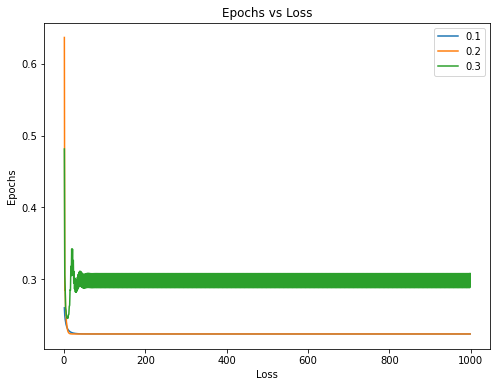

In [23]:
plt.figure(figsize=(8, 6))
for i in range(len(loss_list)):
    plt.plot(np.arange(1, epochs), loss_list[i][1][1:], label=loss_list[i][0])

plt.title('Epochs vs Loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend()
plt.show()

## Constructing Final Model

In [24]:
model = LogReg_GD(X_train_scaled.shape[1])
epochs = 1000
learning_rate = 0.1
model.gradient_descent(X_train_scaled, y_train, epochs, learning_rate)
print(f'Weight : {model.weight}')
print(f'Bias : {model.bias}')

Weight : [4.05171201 3.68186598]
Bias : 1.550657122958317


## Prediction using the Model

Kita telah melakukan training **Logistic Regression** model kita dan juga dioptimisasi dengan **Gradient Descent**, Setelah itu kita juga ingin melakukan predict untuk melihat hasil y prediction kita menggunakan model tersebut. Namun, hasil y prediction ini yang telah menggunakan sigmoid function menghasilkan value berupa probability antara 0 hingga 1, sehingga kita membutuhkan **Threshold** Untuk mengubah value tersebut menjadi hanya 0 dan 1 dengan batas threshold berupa 0.5

In [25]:
def threshold(y):
    return [1 if i >= 0.5 else 0 for i in y]

## Comparison
- y value with y prediction on training data

In [26]:
y_prediction_probability = model.predict(model.weight, X_train_scaled, model.bias)
y_prediction_threshold = threshold(y_prediction_probability)
data_pred_train = pd.DataFrame({
    'Ground Truth': y_train,
    'Prediction': y_prediction_threshold,
    'Prediction Probability': y_prediction_probability
})

data_pred_train

,Ground Truth,Prediction,Prediction Probability
96,1,1,0.719940
95,1,1,0.832762
11,0,0,0.027450
97,1,1,0.999843
13,1,1,0.999784
...,...,...,...
10,0,1,0.889990
6,1,1,0.998574
68,1,1,0.999927
82,1,1,0.874052


### Cost Function

In [27]:
def cost_function(X, y, y_prediction):
    m = X.shape[0]
    return (-1/m)*np.sum(y*np.log(y_prediction) + (1-y)*np.log(1-y_prediction))

print(f'Cost Value on Training Data : {cost_function(X_train_scaled, y_train, y_prediction_probability)}')

Cost Value on Training Data : 0.22367201252759858


- Validation Data

In [33]:
y_valid_probability = model.predict(model.weight, X_valid_scaled, model.bias)
y_valid_threshold = threshold(y_valid_probability)
data_pred_valid = pd.DataFrame({
    'Ground Truth': y_valid,
    'Prediction': y_valid_threshold,
    'Prediction Probability': y_valid_probability
})

data_pred_valid

,Ground Truth,Prediction,Prediction Probability
37,1,1,0.983881
49,1,1,0.999985
48,1,1,0.998882
65,0,0,0.039009
51,1,1,0.999275
99,1,1,0.999636
44,0,0,0.004592
4,1,1,0.997507
73,1,1,0.862851
15,1,1,0.975778


## Model Evaluation

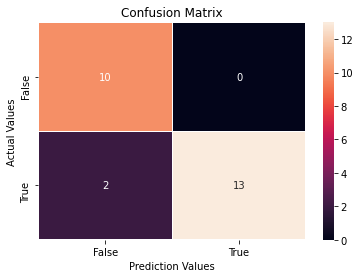

In [34]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_valid, y_valid_threshold)
ax = sns.heatmap(cf, annot=True, linewidth=0.1)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Prediction Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [35]:
TRUTH_VALUE = y_valid
print(f'Accuracy Score: {accuracy_score(TRUTH_VALUE, y_valid_threshold)}')
print(f'Precision Score: {precision_score(TRUTH_VALUE, y_valid_threshold)}')
print(f'Recall Score: {recall_score(TRUTH_VALUE, y_valid_threshold)}')
print(f'F1 Score: {f1_score(TRUTH_VALUE, y_valid_threshold)}')
print(f'\nClassification Score:\n {classification_report(TRUTH_VALUE, y_valid_threshold)}')

Accuracy Score: 0.92
Precision Score: 1.0
Recall Score: 0.8666666666666667
F1 Score: 0.9285714285714286

Classification Score:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.87      0.93        15

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

